In [1]:
import numpy as np
import mnist

In [2]:
def relu(x):
    return np.maximum(0, x)

In [3]:
data = mnist.load_mnist(flatten = True, one_hot_label=True)

In [4]:
training_idx = 0
test_idx = 1
image_idx = 0
label_idx = 1

In [5]:
import matplotlib.pyplot as plt

In [6]:
inputData = data[training_idx][image_idx]
labelData = data[training_idx][label_idx]

In [54]:
# class

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    # np.exp(-x) が大きくなりすぎるとエラーが出るため、クリッピング対策
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # シグモイドの微分は s * (1 - s) で計算できる
    s = sigmoid(x)
    return s * (1 - s)
    
## ここでは活性化関数にReLU関数を用いるためHe初期値を用いる。

class NN:
    def __init__(self, inputDataSize):
        self.weight1 = np.random.rand(inputDataSize, 16) / np.sqrt(inputDataSize)
        self.bias1 = np.random.rand(16, )
        
        # len(layer1) = 16
        self.weight2 = np.random.rand(16, 16) / np.sqrt(16)
        self.bias2 = np.random.rand(16, )
        # len(layer2) = 16
        self.weight3 = np.random.rand(16, 10) / np.sqrt(16)
        self.bias3 = np.random.rand(10, )

    def forward(self, inputData):
        self.inputData = inputData
        self.z1 = np.dot(inputData, self.weight1) + self.bias1
        self.z1_s = relu(self.z1)

        self.z2 = np.dot(self.z1, self.weight2) + self.bias2
        self.z2_s = relu(self.z2)

        self.z3 = np.dot(self.z2, self.weight3) + self.bias3
        
        self.output = relu(self.z3)
        # ReLUだと誤差逆伝播法でウェイトの値が爆発しちゃうのでシグモイド関数で抑え込んだ。
        return self.output

    def backward(self, meandiff, learning_rate=0.01):
        delta3 = 2 * meandiff * sigmoid_derivative(self.z3)
        # print("delta3", delta3)
        z2 = sigmoid_derivative(self.z2.reshape(1, -1))
        delta3 = delta3.reshape(1, -1)
        z1 = sigmoid_derivative(self.z1.reshape(1, -1))
        inputData = self.inputData.reshape(1, -1)
        
        dW3 = np.dot(z2.T, delta3)
        # print("dW3", dW3)
        db3 = np.sum(delta3, axis=0)
        # print("db3", db3)

        delta2 = np.dot(delta3, self.weight3.T)
        # print("delta2", delta2)
        dW2 = np.dot(z1.T, delta2)
        # print("dW2", dW2)
        db2 = np.sum(delta2, axis=0)
        # print("db2", db2)

        delta1 = np.dot(delta2, self.weight2.T)
        # print("delta1", delta1)
        dW1 = np.dot(inputData.T, delta1)
        # print("dW1", dW1)
        db1 = np.sum(delta1, axis=0)
        # print("db1", db1)

        # パラメータの更新
        self.weight3 -= learning_rate * dW3
        # print("weight3", self.weight3)
        self.bias3   -= learning_rate * db3
        # print("bias3", self.bias3)
        self.weight2 -= learning_rate * dW2
        # print("weight2", self.weight2)
        self.bias2   -= learning_rate * db2
        # print("bias2", self.bias2)
        self.weight1 -= learning_rate * dW1
        # print("weight1", self.weight1)
        self.bias1   -= learning_rate * db1
        # print("bias1", self.bias1)

In [55]:
meandiff = 0
nn = NN(784)

for i in range(10):
    for idx, elem in enumerate(inputData[0:60000]):
        result = nn.forward(elem)
        diff = result - labelData[idx]
        nn.backward(diff, 0.005)

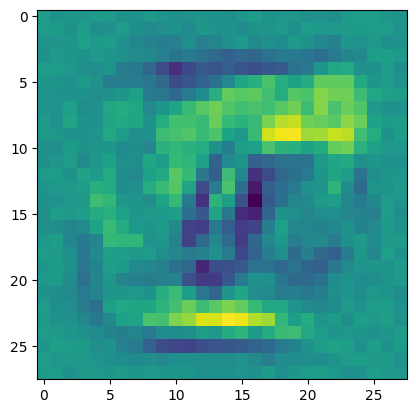

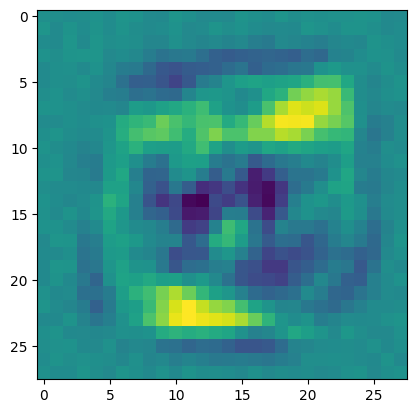

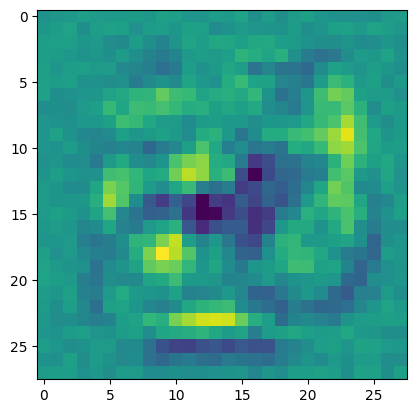

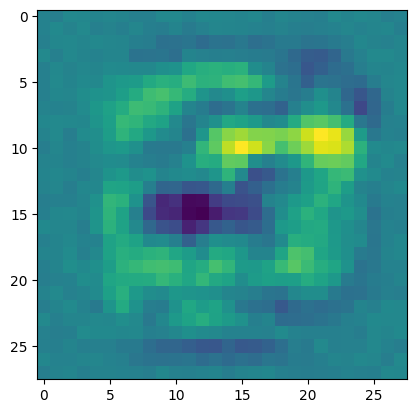

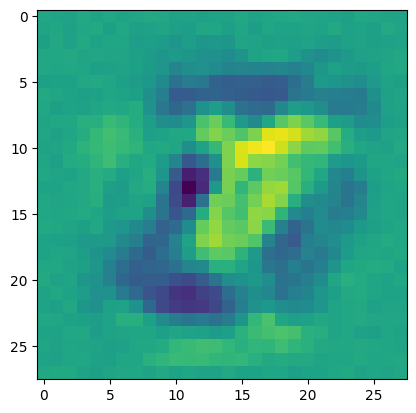

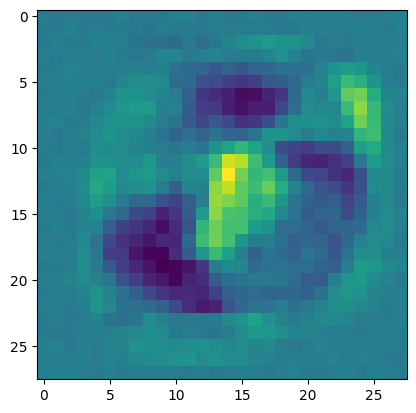

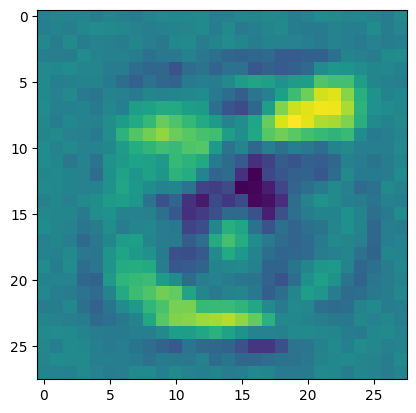

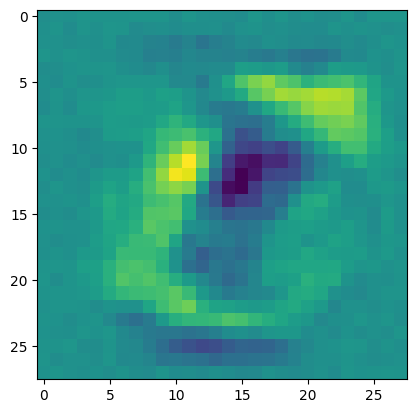

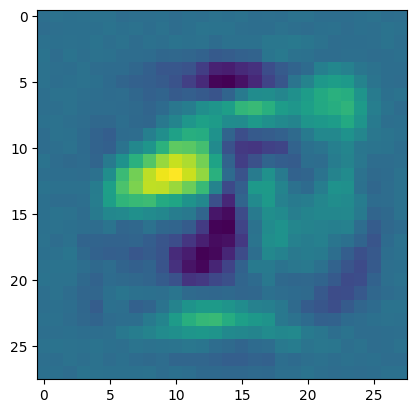

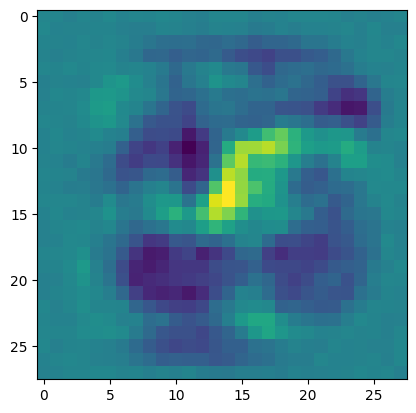

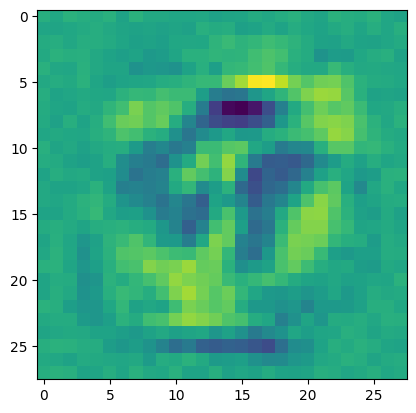

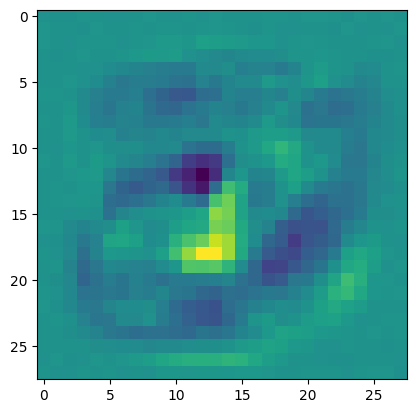

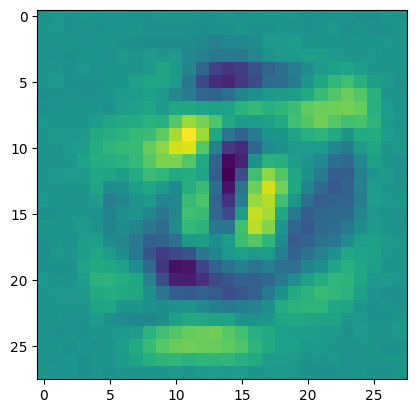

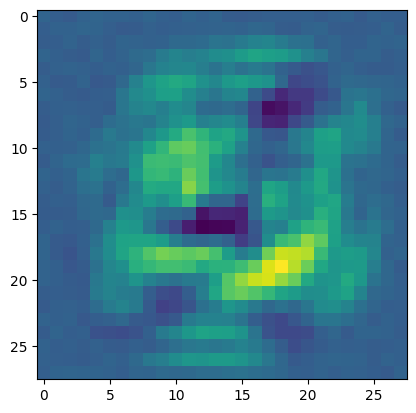

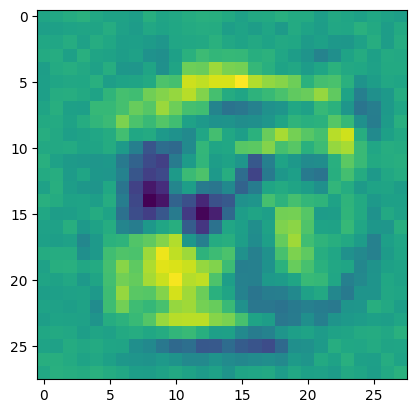

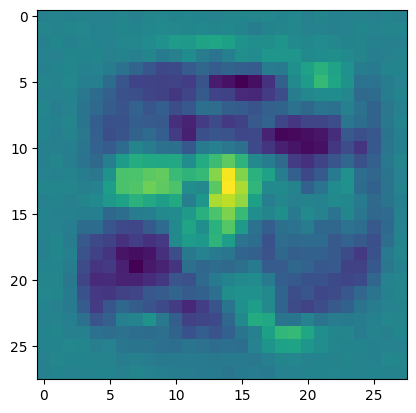

In [56]:
for i in range(16):
    plt.imshow(nn.weight1.T[i].reshape(28, 28))
    plt.show()

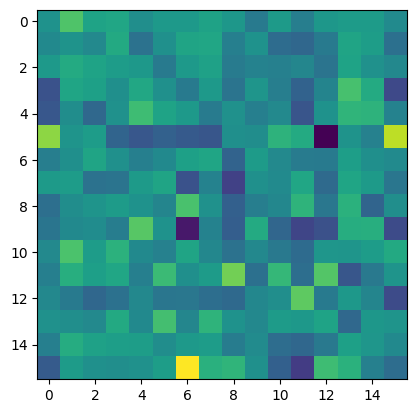

In [57]:
plt.imshow(nn.weight2)

In [49]:
result = nn.forward(inputData[1])
np.where(result == np.max(result))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)

In [50]:
score = 0
loseIdx = []
failureResult = []

for idx, elem in enumerate(inputData[0:60000]):
    result = nn.forward(inputData[idx])
    resultMaximum = np.where(result == np.max(result))
    labelMaximum = np.where(labelData[idx] == np.max(labelData[idx]))
    if resultMaximum == labelMaximum:
        score+=1
    else:
        loseIdx.append(idx)
        failureResult.append((idx, resultMaximum, labelMaximum))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print(score / 60000 * 100, "%")

In [ ]:
testData = data[test_idx][image_idx]
testLabelData = data[test_idx][label_idx]

In [ ]:
len(testData)

In [ ]:
score = 0
loseIdx = []
failureResult = []

for idx, elem in enumerate(testData):
    result = nn.forward(testData[idx])
    resultMaximum = np.where(result == np.max(result))
    labelMaximum = np.where(testLabelData[idx] == np.max(testLabelData[idx]))
    if resultMaximum == labelMaximum:
        score+=1
    else:
        loseIdx.append(idx)
        failureResult.append((idx, resultMaximum, labelMaximum))

In [ ]:
print(score / 10000 * 100, "%")

In [18]:
loseIdx[0:10]

[1, 8, 9, 15, 18, 23, 35, 38, 43, 45]

(46, (array([6]),), (array([1]),))


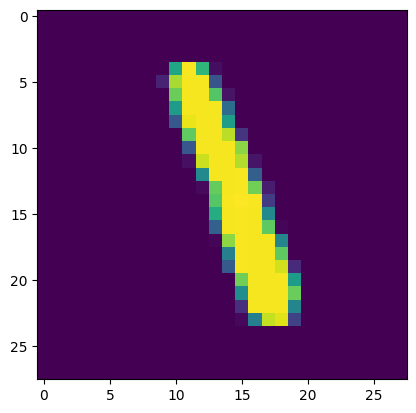

(47, (array([6]),), (array([2]),))


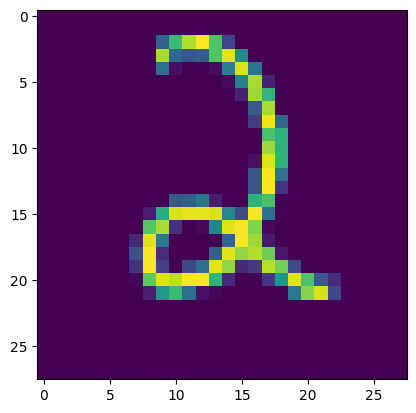

(53, (array([3]),), (array([5]),))


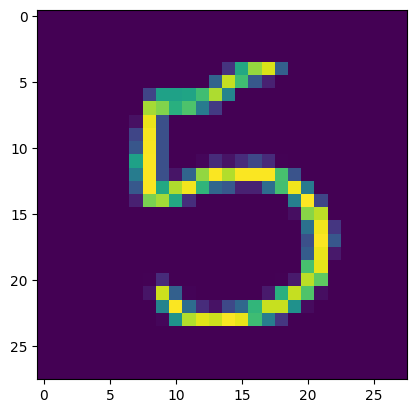

(55, (array([3]),), (array([0]),))


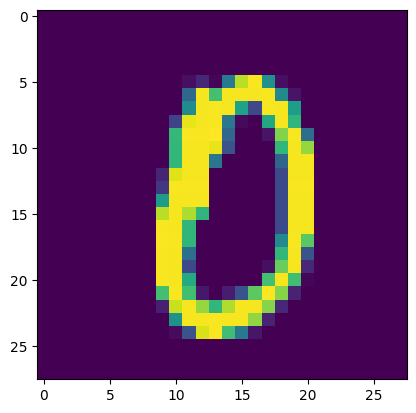

(59, (array([7]),), (array([5]),))


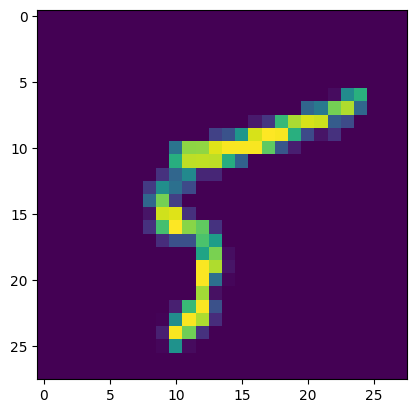

(61, (array([4]),), (array([8]),))


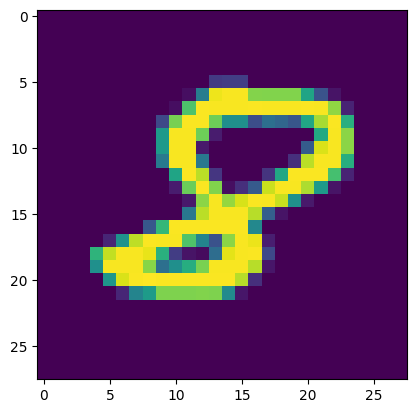

(66, (array([0]),), (array([6]),))


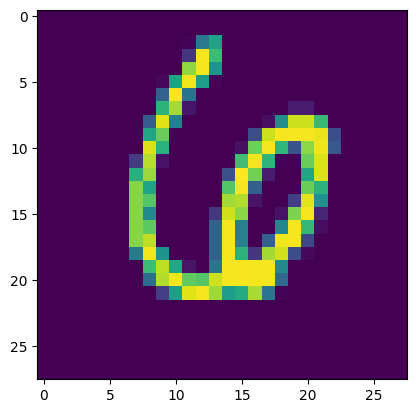

(72, (array([0]),), (array([2]),))


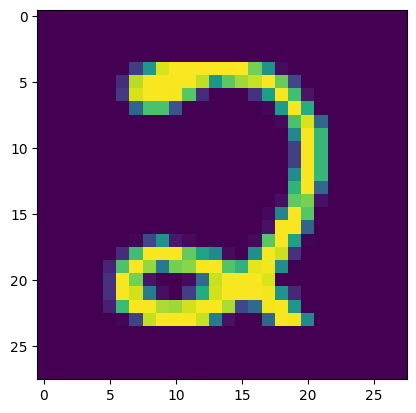

(73, (array([1]),), (array([9]),))


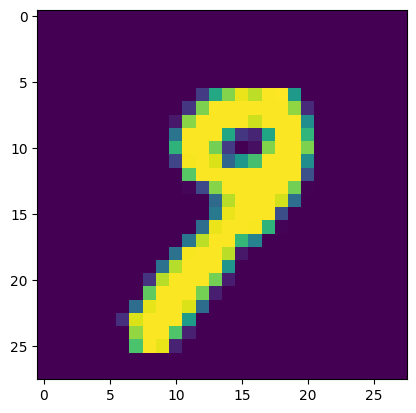

(77, (array([7]),), (array([2]),))


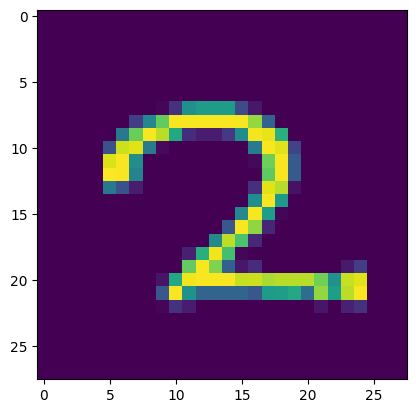

In [19]:
for i in range(10,20):
    print(failureResult[i])
    plt.imshow(testData[loseIdx[i]].reshape(28,28))
    plt.show()

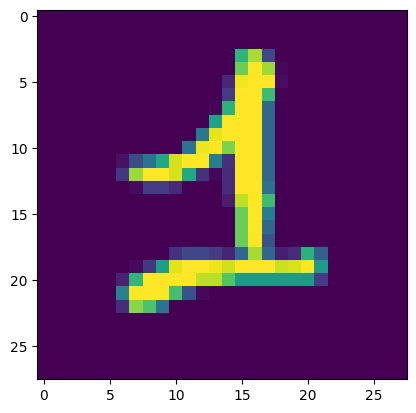

In [20]:
plt.imshow(inputData[24].reshape(28, 28))

In [21]:
failureResult[0]

(1, (array([3]),), (array([2]),))

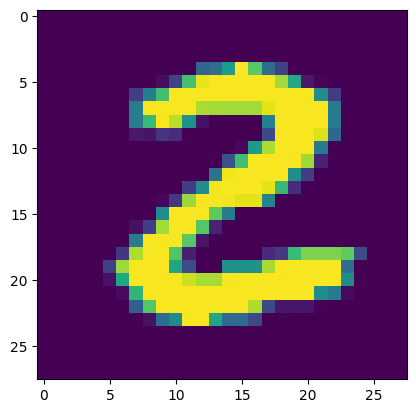

In [22]:
plt.imshow(inputData[25].reshape(28, 28))

In [23]:
failureResult[1]

(8, (array([4]),), (array([5]),))